In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('demandforecastdata .csv')
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
#Preprocessing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
record_ID          150150 non-null int64
week               150150 non-null object
store_id           150150 non-null int64
sku_id             150150 non-null int64
total_price        150149 non-null float64
base_price         150150 non-null float64
is_featured_sku    150150 non-null int64
is_display_sku     150150 non-null int64
units_sold         150150 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [6]:
df['total_price'].value_counts()

205.9125    7048
213.0375    5272
177.4125    4544
469.5375    4489
227.2875    4150
            ... 
52.7250        1
527.2500       1
421.8000       1
496.6125       1
517.2750       1
Name: total_price, Length: 646, dtype: int64

In [7]:
df[df['total_price'].isna()]


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


In [8]:
df['base_price'] = df.groupby('sku_id')['base_price']\
                     .transform(lambda x: x.fillna(x.median()))


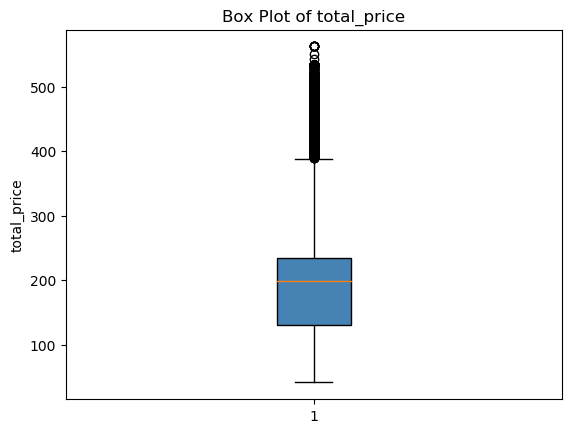

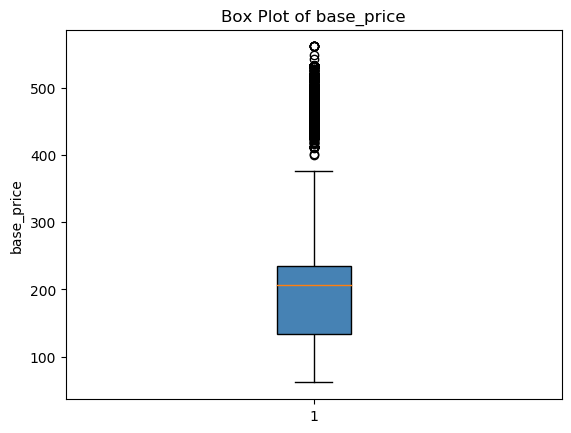

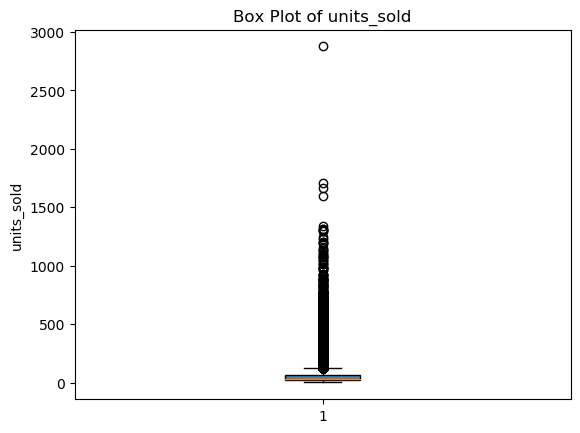

In [14]:
cols = ['total_price', 'base_price', 'units_sold']

for col in cols:
    plt.figure()
    plt.boxplot(
        df[col].dropna(),
        patch_artist=True,
        boxprops=dict(facecolor='steelblue')
    )
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()


In [15]:
df['total_price'] = df['total_price'].clip(lower, upper)
df['base_price'] = df['base_price'].clip(lower, upper)
df['units_sold_log'] = np.log1p(df['units_sold'])

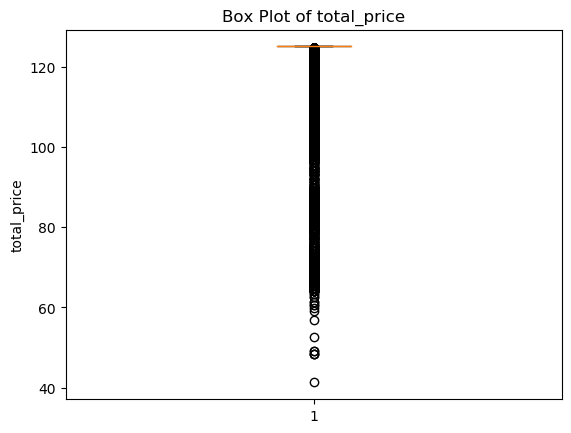

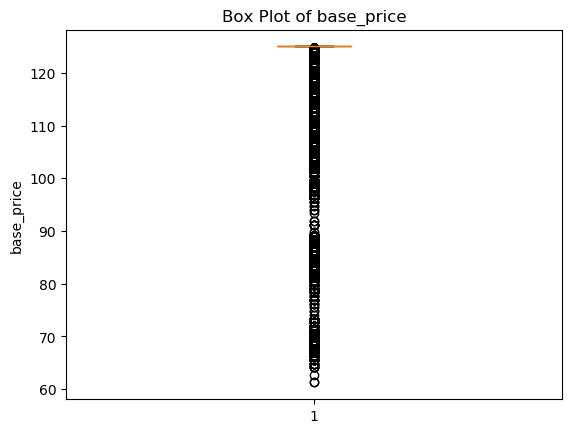

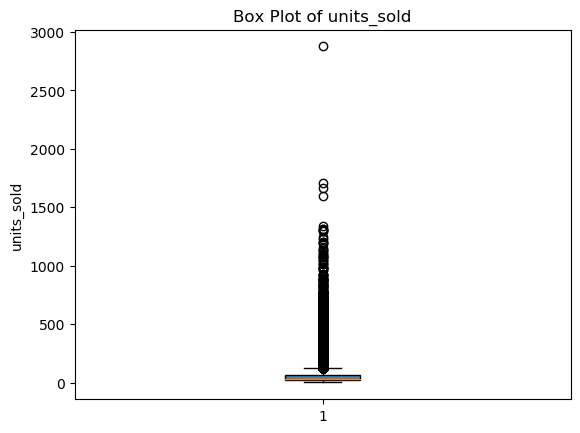

In [17]:
cols = ['total_price', 'base_price', 'units_sold']

for col in cols:
    plt.figure()
    plt.boxplot(
        df[col].dropna(),
        patch_artist=True,
        boxprops=dict(facecolor='steelblue')
    )
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()
    